In [1]:
einpta_dir='/home/subhajit/Desktop/EPTAWM/Data/DR2new+/EPTA+InPTA_trimdata_HD/'
epta_dir='/home/subhajit/Desktop/EPTAWM/Data/DR2new/chains_ep_chen/hd_pl/'

In [2]:
import numpy as np
import os, glob, json, sys, pickle
import optparse
from chainconsumer import ChainConsumer

In [3]:
term='hd_trim'

In [4]:
script_loc='/home/subhajit/Desktop/EPTAWM/'
import sys, os
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append(script_loc)
from diff_chain import  Diff_chain_shift

2023-06-09 18:36:52.136385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 18:36:52.164543: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 18:36:52.164982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 18:36:52.662192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
par_einpta=pd.read_csv(einpta_dir+'pars.txt', header = None)
lf=len(par_einpta)
par_einpta;
einpta_1=np.loadtxt(einpta_dir+'chain_1.txt',usecols=(lf-2,lf-1,-3))
einpta=einpta_1.T[0:2]

In [6]:
names_red = ['gamma','logA']
labels_red=['\gamma','\log_{10} A']
del_names=['delta_gamma','delta_logA']

In [7]:
par_epta=pd.read_csv(epta_dir+'pars.txt', header = None)
lf=len(par_epta)
par_epta;

In [8]:
epta_1=np.loadtxt(epta_dir+'chain_1.txt',usecols=(lf-2,lf-1,-3))

In [9]:
epta=epta_1.T[0:2]

In [10]:
epta_red=MCSamples(samples=np.array(epta).transpose(),loglikes=epta_1.T[-1],names = names_red,labels=labels_red,label='DR2new')

In [11]:
einpta_red=MCSamples(samples=np.array(einpta).transpose(),loglikes=einpta_1.T[-1],names = names_red,labels=labels_red,label='DR2new+')

In [12]:
if not os.path.exists('./Figures'):
        os.mkdir('./Figures')

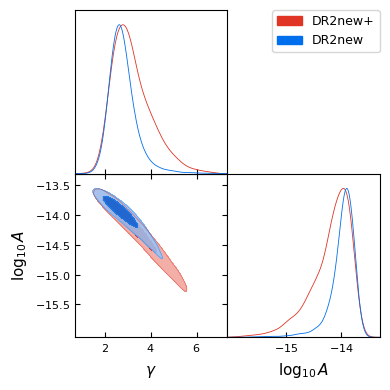

In [13]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([einpta_red,epta_red], filled=True)
plt.savefig('./Figures/'+term+'.png',dpi=300)
plt.show()

In [14]:
def plot_diff_chain(A1,A2,lims=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2)
    
    shift_probability=utilities.from_sigma_to_confidence(nsig)
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' vs '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.3f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig('./Figures/'+'diff_'+term+A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability

(<getdist.mcsamples.MCSamples at 0x7f7458c6d490>, 0.09665082597872822)

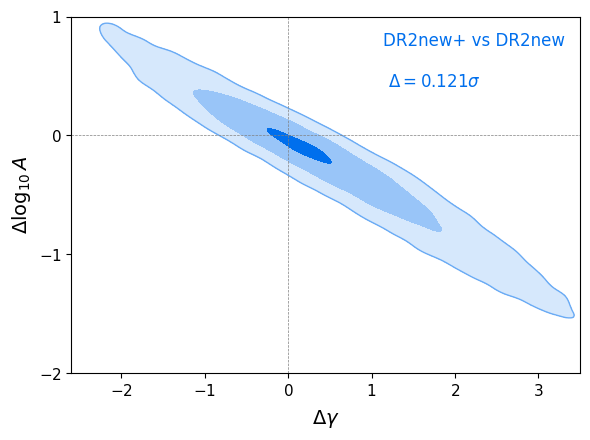

In [16]:
plot_diff_chain(einpta_red,epta_red,lims=[-2.6,3.5,-2,1])